In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

file_path = './PEDE_PASSOS_DATASET_FIAP.csv'
pd.set_option('display.max_columns', None)
df = pd.read_csv(file_path, delimiter=';')

# Analisando os dados 🔎

In [ ]:
# Tem algumas inconsistências de nomenclatura em relação ao dataset e o PDF de dicionário, mas acho que tudo bem...
# Reparei também que temos colunas faltando, sendo elas: **REC_PSICO_2021**, **REC_PSICO_2022** e **INSTITUICAO_ENSINO_ALUNO_2022**.

**Essa linha demonstra que o Aluno foi ingressado em 2022, e todas as outras colunas são nulas. Uma recomendação seria criar para cada ano um dataset separado para início das análises.** 🤔

In [ ]:
pd.DataFrame(df.loc[df['NOME'] == 'ALUNO-2']).transpose().T

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.2,9.433333,NaN,2.0,5.625,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)


In [ ]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [ ]:
# df.info()

# Tivemos adição de colunas novas no dataset ao longo do tempo 🤔

In [ ]:
len(df.columns[df.columns.str.contains('2020')])

18

In [ ]:
df.columns[df.columns.str.contains('2020')]

Index(['INSTITUICAO_ENSINO_ALUNO_2020', 'IDADE_ALUNO_2020', 'ANOS_PM_2020',
       'FASE_TURMA_2020', 'PONTO_VIRADA_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'PEDRA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IDA_2020', 'DESTAQUE_IPV_2020', 'IAA_2020', 'IEG_2020',
       'IPS_2020', 'IDA_2020', 'IPP_2020', 'IPV_2020', 'IAN_2020'],
      dtype='object')

In [ ]:
len(df.columns[df.columns.str.contains('2021')])

20

In [ ]:
df.columns[df.columns.str.contains('2021')]

Index(['FASE_2021', 'TURMA_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'PEDRA_2021', 'INDE_2021', 'IAA_2021',
       'IEG_2021', 'IPS_2021', 'IDA_2021', 'IPP_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'PONTO_VIRADA_2021', 'IPV_2021', 'IAN_2021', 'NIVEL_IDEAL_2021',
       'DEFASAGEM_2021'],
      dtype='object')

In [ ]:
len(df.columns[df.columns.str.contains('2022')])

30

In [ ]:
df.columns[df.columns.str.contains('2022')]

Index(['FASE_2022', 'TURMA_2022', 'ANO_INGRESSO_2022', 'BOLSISTA_2022',
       'INDE_2022', 'CG_2022', 'CF_2022', 'CT_2022', 'PEDRA_2022',
       'DESTAQUE_IEG_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IPV_2022',
       'IAA_2022', 'IEG_2022', 'IPS_2022', 'IDA_2022', 'NOTA_PORT_2022',
       'NOTA_MAT_2022', 'NOTA_ING_2022', 'QTD_AVAL_2022', 'IPP_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'INDICADO_BOLSA_2022', 'PONTO_VIRADA_2022', 'IPV_2022', 'IAN_2022',
       'NIVEL_IDEAL_2022'],
      dtype='object')

# Funções reutilizáveis 🤓

In [ ]:
def filter_columns(df, filters: list): # adiciono no array o padrão que existe nas colunas e que não quero que tenha na saída final
    selected_columns = [True] * len(df.columns)  # Inicializa todas as colunas como True
    for index, column in enumerate(df.columns):
        if any(filter in column for filter in filters): selected_columns[index] = False
    return df[df.columns[selected_columns]]

In [ ]:
def cleaning_dataset(df):
  _df = df.dropna(subset=df.columns.difference(['NOME']), how='all') # executa o dropna para todas as colunas sem visualizar a coluna NOME
  _df = _df[~_df.isna().all(axis=1)] # remove linhas com apenas NaN, se tiver algum dado na linha não remove
  return _df

In [ ]:
def plot_exact_counter(size, x, y, df) -> None:
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd

  plt.figure(figsize=size)
  barplot = plt.bar(y.index, y.values)
  plt.xlabel(x)
  plt.ylabel('Count')

  for index, value in enumerate(y.values):
        plt.text(index, value, round(value, 2), color='black', ha="center")

  plt.show()

In [ ]:
def analyse_corr(df):
  import seaborn as sns
  import matplotlib.pyplot as plt

  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  plt.figure(figsize=(10, 8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
  plt.show()

# DF - 2020




In [ ]:
df_2020 = filter_columns(df, ['2021', '2022'])
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10


In [ ]:
len(df_2020) # com NaN

1349

In [ ]:
df_2020 = cleaning_dataset(df_2020)
len(df_2020)

728

In [ ]:
df_2020['INSTITUICAO_ENSINO_ALUNO_2020'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2020,
Escola Pública,598
Rede Decisão/União,101
FIAP,11
UNISA,10
Estácio,3
Einstein,2
Escola João Paulo II,2
V202,1


In [ ]:
df_2020.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10
7,Rede Decisão/União,ALUNO-8,14,3,4L,Sim,8.381390666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.33334,9.9,4.375,7.333333333333333,8.749999999999998,8.94445,10


In [ ]:
df_2020['PEDRA_2020'].value_counts()

,count
PEDRA_2020,
Ametista,336
Ágata,171
Quartzo,128
Topázio,92
D9891/2A,1


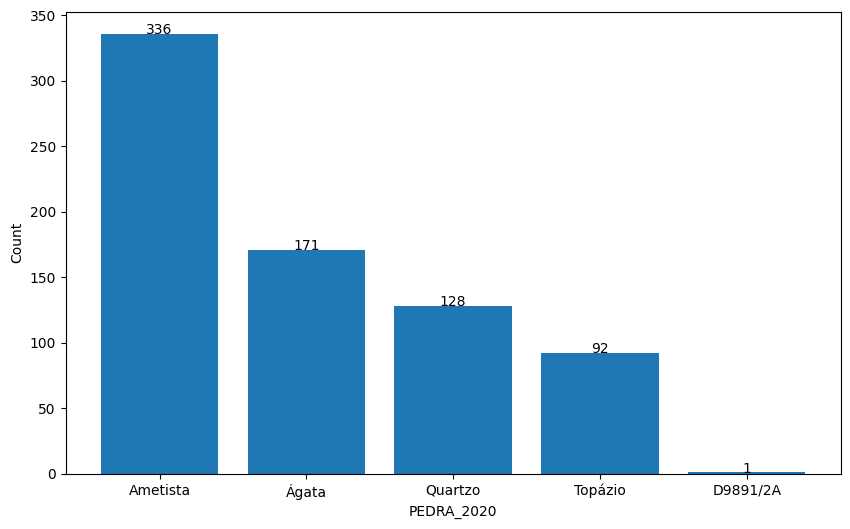

In [ ]:
plot_exact_counter(size=(10, 6), x='PEDRA_2020', y=df_2020['PEDRA_2020'].value_counts(), df=df_2020)

# **Ideias** 🤔

* Predição de desempenho futuro e análise de outliers (*O que fez alguns alunos serem um dos melhores que já passou na Passos?*)
* Predição para recomendação de bolsas, intercambio, etc
* Análise comparatória de 2020, 2021 e 2022
* Análise de alunos (*de forma individual? 🤔*) ao longo dos anos (*Ex: temos dados do 'ALUNO 1' em 2020 e 2021, já em 2022 não temos dados... Seria talvez desistência?*)
* Análise de alunos que estão indo bem Vs alunos que não estão indo bem. Tentar entender o porquê um aluno vai bem e outro não.
* Tentar prever qual seria a “pedra” de um novo aluno com X pontuações de índices em uma nova entrada


# 2021

In [ ]:
df_2021 = filter_columns(df, ['2020', '2022'])
df_2021 = cleaning_dataset(df_2021)
df_2021.head()

,NOME,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021
0,ALUNO-1,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0
2,ALUNO-3,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0
4,ALUNO-5,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0
7,ALUNO-8,5.0,L,Rede Decisão,Veterano,Topázio,8.269,8.8,8.6,7.5,7.1,8.0,Promovido de Fase + Bolsa,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não,8.5,10.0,Nível 5 (1o EM),0.0
10,ALUNO-11,1.0,A,Rede Decisão,Veterano,Topázio,8.990,9.0,10.0,6.3,8.8,7.7,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Sim,9.7,10.0,Nível 1 (4o ano),0.0


In [ ]:
df_2021['INSTITUICAO_ENSINO_ALUNO_2021'].value_counts()

,count
INSTITUICAO_ENSINO_ALUNO_2021,
Escola Pública,557
Rede Decisão,127
Escola JP II,2


# 2022

In [ ]:
df_2022 = filter_columns(df, ['2020', '2021'])
df_2022 = cleaning_dataset(df_2022)
df_2022.head()

dados_2022 = df_2022

In [ ]:
df_2020.columns.sort_values()

Index(['ANOS_PM_2020', 'DESTAQUE_IDA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IPV_2020', 'FASE_TURMA_2020', 'IAA_2020', 'IAN_2020',
       'IDADE_ALUNO_2020', 'IDA_2020', 'IEG_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IPP_2020',
       'IPS_2020', 'IPV_2020', 'NOME', 'PEDRA_2020', 'PONTO_VIRADA_2020'],
      dtype='object')

In [ ]:
df_2021.columns.sort_values()

Index(['DEFASAGEM_2021', 'FASE_2021', 'IAA_2021', 'IAN_2021', 'IDA_2021',
       'IEG_2021', 'INDE_2021', 'INSTITUICAO_ENSINO_ALUNO_2021', 'IPP_2021',
       'IPS_2021', 'IPV_2021', 'NIVEL_IDEAL_2021', 'NOME', 'PEDRA_2021',
       'PONTO_VIRADA_2021', 'REC_EQUIPE_1_2021', 'REC_EQUIPE_2_2021',
       'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'TURMA_2021'],
      dtype='object')

In [ ]:
df_2022.columns.sort_values()

Index(['ANO_INGRESSO_2022', 'BOLSISTA_2022', 'CF_2022', 'CG_2022', 'CT_2022',
       'DESTAQUE_IDA_2022', 'DESTAQUE_IEG_2022', 'DESTAQUE_IPV_2022',
       'FASE_2022', 'IAA_2022', 'IAN_2022', 'IDA_2022', 'IEG_2022',
       'INDE_2022', 'INDICADO_BOLSA_2022', 'IPP_2022', 'IPS_2022', 'IPV_2022',
       'NIVEL_IDEAL_2022', 'NOME', 'NOTA_ING_2022', 'NOTA_MAT_2022',
       'NOTA_PORT_2022', 'PEDRA_2022', 'PONTO_VIRADA_2022', 'QTD_AVAL_2022',
       'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022', 'REC_AVA_4_2022',
       'TURMA_2022'],
      dtype='object')

In [ ]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
Index: 862 entries, 1 to 1348
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   NOME                 862 non-null    object 
 1   FASE_2022            862 non-null    float64
 2   TURMA_2022           862 non-null    object 
 3   ANO_INGRESSO_2022    862 non-null    float64
 4   BOLSISTA_2022        862 non-null    object 
 5   INDE_2022            862 non-null    float64
 6   CG_2022              862 non-null    float64
 7   CF_2022              862 non-null    float64
 8   CT_2022              862 non-null    float64
 9   PEDRA_2022           862 non-null    object 
 10  DESTAQUE_IEG_2022    862 non-null    object 
 11  DESTAQUE_IDA_2022    862 non-null    object 
 12  DESTAQUE_IPV_2022    862 non-null    object 
 13  IAA_2022             862 non-null    float64
 14  IEG_2022             862 non-null    float64
 15  IPS_2022             862 non-null    float64

In [ ]:
df_2020['ANO'] = 2020
df_2021['ANO'] = 2021
df_2022['ANO'] = 2022

In [ ]:
df_2020.columns.sort_values()

Index(['ANO', 'ANOS_PM_2020', 'DESTAQUE_IDA_2020', 'DESTAQUE_IEG_2020',
       'DESTAQUE_IPV_2020', 'FASE_TURMA_2020', 'IAA_2020', 'IAN_2020',
       'IDADE_ALUNO_2020', 'IDA_2020', 'IEG_2020', 'INDE_2020',
       'INDE_CONCEITO_2020', 'INSTITUICAO_ENSINO_ALUNO_2020', 'IPP_2020',
       'IPS_2020', 'IPV_2020', 'NOME', 'PEDRA_2020', 'PONTO_VIRADA_2020'],
      dtype='object')

In [ ]:
df_2021.columns.sort_values()

Index(['ANO', 'DEFASAGEM_2021', 'FASE_2021', 'IAA_2021', 'IAN_2021',
       'IDA_2021', 'IEG_2021', 'INDE_2021', 'INSTITUICAO_ENSINO_ALUNO_2021',
       'IPP_2021', 'IPS_2021', 'IPV_2021', 'NIVEL_IDEAL_2021', 'NOME',
       'PEDRA_2021', 'PONTO_VIRADA_2021', 'REC_EQUIPE_1_2021',
       'REC_EQUIPE_2_2021', 'REC_EQUIPE_3_2021', 'REC_EQUIPE_4_2021',
       'SINALIZADOR_INGRESSANTE_2021', 'TURMA_2021'],
      dtype='object')

In [ ]:
df_2022.columns.sort_values()

Index(['ANO', 'ANO_INGRESSO_2022', 'BOLSISTA_2022', 'CF_2022', 'CG_2022',
       'CT_2022', 'DESTAQUE_IDA_2022', 'DESTAQUE_IEG_2022',
       'DESTAQUE_IPV_2022', 'FASE_2022', 'IAA_2022', 'IAN_2022', 'IDA_2022',
       'IEG_2022', 'INDE_2022', 'INDICADO_BOLSA_2022', 'IPP_2022', 'IPS_2022',
       'IPV_2022', 'NIVEL_IDEAL_2022', 'NOME', 'NOTA_ING_2022',
       'NOTA_MAT_2022', 'NOTA_PORT_2022', 'PEDRA_2022', 'PONTO_VIRADA_2022',
       'QTD_AVAL_2022', 'REC_AVA_1_2022', 'REC_AVA_2_2022', 'REC_AVA_3_2022',
       'REC_AVA_4_2022', 'TURMA_2022'],
      dtype='object')

In [ ]:
df_2020 = df_2020.rename(columns={'IAA_2020':'IAA','IAN_2020':'IAN','IDA_2020':'IDA', 'IEG_2020':'IEG', 'INDE_2020':'INDE', 'IPP_2020':'IPP', 'IPS_2020':'IPS', 'IPV_2020':'IPV', 'PONTO_VIRADA_2020':'PONTO_VIRADA', 'PEDRA_2020':'PEDRA' })
df_2020 = df_2020.drop(df_2020.columns[df_2020.columns.str.contains('2020')], axis=1)

In [ ]:
df_2021 = df_2021.rename(columns={'IAA_2021':'IAA','IAN_2021':'IAN','IDA_2021':'IDA', 'IEG_2021':'IEG', 'INDE_2021':'INDE', 'IPP_2021':'IPP', 'IPS_2021':'IPS', 'IPV_2021':'IPV', 'PONTO_VIRADA_2021':'PONTO_VIRADA', 'PEDRA_2021':'PEDRA' })
df_2021 = df_2021.drop(df_2021.columns[df_2021.columns.str.contains('2021')], axis=1)

In [ ]:
df_2022 = df_2022.rename(columns={'IAA_2022':'IAA','IAN_2022':'IAN','IDA_2022':'IDA', 'IEG_2022':'IEG', 'INDE_2022':'INDE', 'IPP_2022':'IPP', 'IPS_2022':'IPS', 'IPV_2022':'IPV', 'PONTO_VIRADA_2022':'PONTO_VIRADA', 'PEDRA_2022':'PEDRA' })
df_2022 = df_2022.drop(df_2022.columns[df_2022.columns.str.contains('2022')], axis=1)

In [ ]:
frames = [df_2020, df_2021, df_2022]

In [ ]:
dados_pm = pd.concat(frames)

In [ ]:
# removendo dados não numericos
dados_pm = dados_pm[(dados_pm.INDE != 'D980') & (dados_pm.INDE != '#NULO!')]

In [ ]:
# convertendo dados para numericos
dados_pm['INDE'] = pd.to_numeric(dados_pm['INDE'])
dados_pm['IAA'] = pd.to_numeric(dados_pm['IAA'])
dados_pm['IEG'] = pd.to_numeric(dados_pm['IEG'])
dados_pm['IPS'] = pd.to_numeric(dados_pm['IPS'])
dados_pm['IDA'] = pd.to_numeric(dados_pm['IDA'])
dados_pm['IPP'] = pd.to_numeric(dados_pm['IPP'])
dados_pm['IPV'] = pd.to_numeric(dados_pm['IPV'])
dados_pm['IAN'] = pd.to_numeric(dados_pm['IAN'])


<ipython-input-183-d21564669141>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-d21564669141>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-d21564669141>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-183-d21

In [ ]:
dados_pm.head()

,NOME,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,ALUNO-1,Não,7.883752,Ametista,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2020
2,ALUNO-3,Não,7.856390,Ametista,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,2020
3,ALUNO-4,Não,5.076252,Quartzo,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,2020
4,ALUNO-5,Não,8.077085,Ametista,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2020
7,ALUNO-8,Sim,8.381391,Ametista,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,2020


# ANALISE DOS DADOS

In [ ]:
valor_medio_indicadores = dados_pm.groupby('ANO')[['INDE','IAA', 'IEG', 'IPS','IDA', 'IPP', 'IPV', 'IAN']].mean()

In [ ]:
valor_medio_indicadores

,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN
ANO,,,,,,,,
2020,7.296111,8.368882,7.681155,6.737448,6.322260,7.067859,7.242243,7.431224
2021,6.888016,8.155702,6.842544,6.848977,5.430556,7.598538,7.429240,6.900585
2022,7.028338,8.263065,7.880728,6.901102,6.070688,6.299364,7.247953,6.421114


In [ ]:
df_valor_medio_indicadores = valor_medio_indicadores.reset_index()

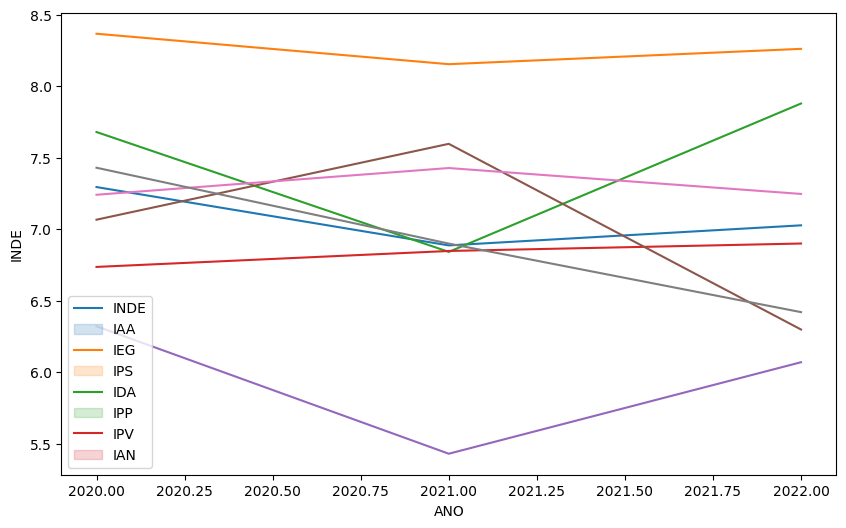

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'ANO', y='INDE', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IAA', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IEG', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IPS', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IDA', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IPP', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IPV', data=df_valor_medio_indicadores)
sns.lineplot(x = 'ANO', y='IAN', data=df_valor_medio_indicadores)
plt.legend(['INDE','IAA', 'IEG', 'IPS','IDA', 'IPP', 'IPV', 'IAN'])
plt.show()






In [ ]:
# calcular taxa de crescimento dos valores INDE
valor_medio_indicadores['taxa_crescimento_inde'] = valor_medio_indicadores['INDE'].diff()


In [ ]:
valor_medio_indicadores

,INDE,IAA,IEG,IPS,IDA,IPP,IPV,IAN,taxa_crescimento_inde
ANO,,,,,,,,,
2020,7.296111,8.368882,7.681155,6.737448,6.322260,7.067859,7.242243,7.431224,NaN
2021,6.888016,8.155702,6.842544,6.848977,5.430556,7.598538,7.429240,6.900585,-0.408094
2022,7.028338,8.263065,7.880728,6.901102,6.070688,6.299364,7.247953,6.421114,0.140322


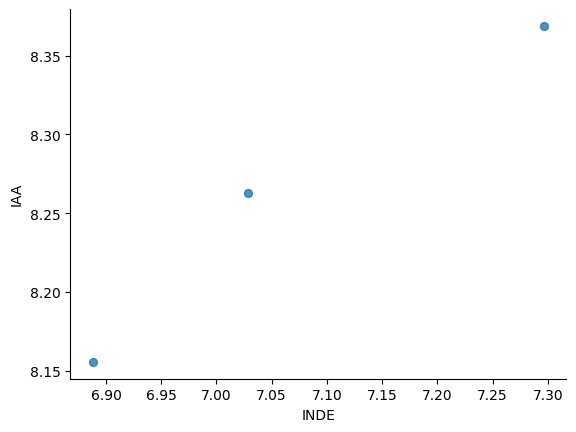

In [ ]:
# @title INDE vs IAA

from matplotlib import pyplot as plt
valor_medio_indicadores.plot(kind='scatter', x='INDE', y='IAA', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

<Axes: xlabel='ANO', ylabel='taxa_crescimento_inde'>

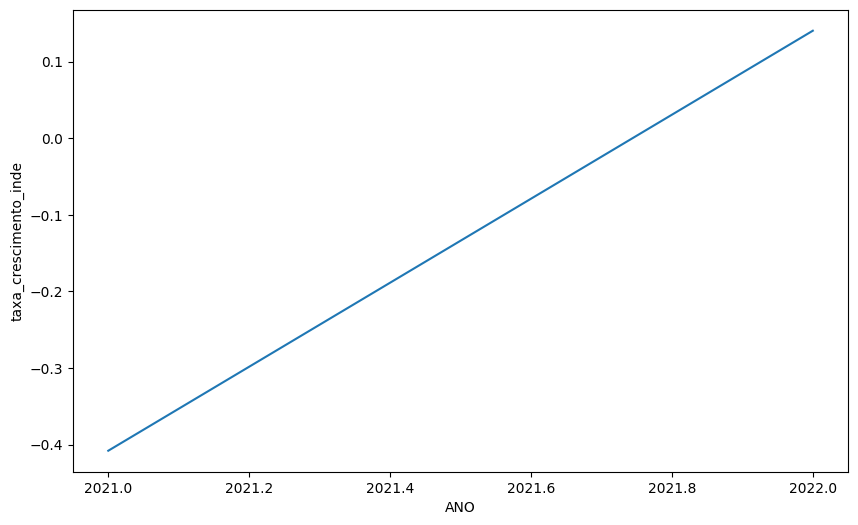

In [ ]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'ANO', y='taxa_crescimento_inde', data=valor_medio_indicadores)

In [ ]:
dados_pm.head()

,NOME,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,ALUNO-1,Não,7.883752,Ametista,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2020
2,ALUNO-3,Não,7.856390,Ametista,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,2020
3,ALUNO-4,Não,5.076252,Quartzo,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,2020
4,ALUNO-5,Não,8.077085,Ametista,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2020
7,ALUNO-8,Sim,8.381391,Ametista,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,2020


<ipython-input-194-990895029ea9>:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




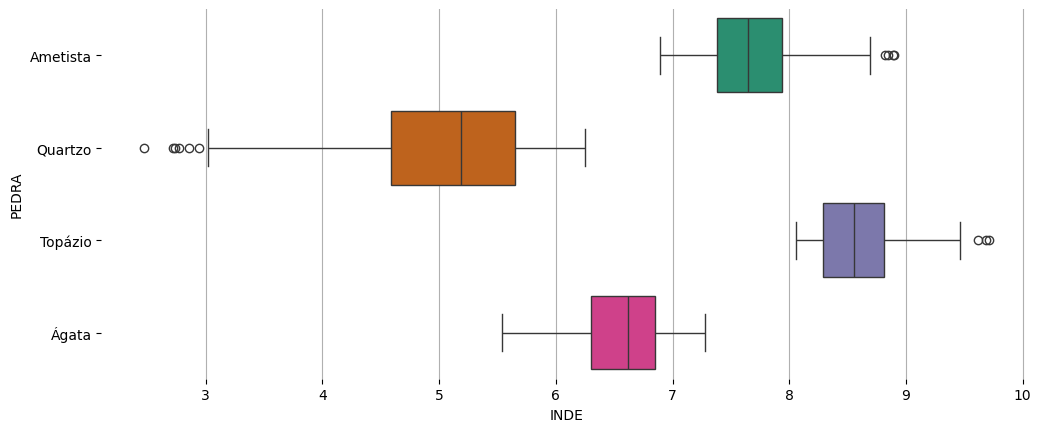

In [ ]:
# @title PEDRA vs IAA


figsize = (12, 1.2 * len(dados_pm['PEDRA'].unique()))
plt.figure(figsize=figsize)
plt.grid()
sns.boxplot(dados_pm, x='INDE', y='PEDRA', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

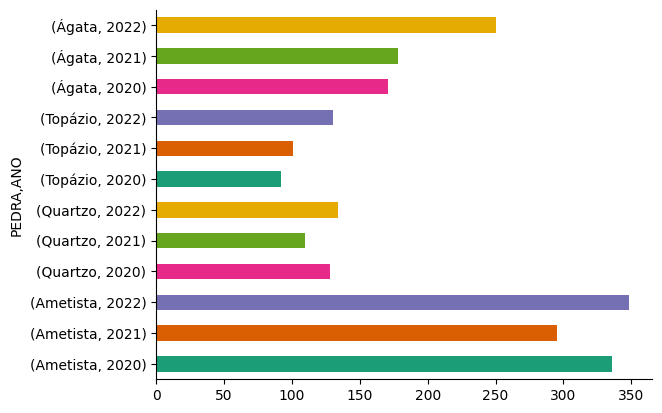

In [ ]:
# PEDRA


dados_pm.groupby(['PEDRA', 'ANO']).size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
pedra_por_ano = dados_pm.groupby(['PEDRA', 'ANO']).size().reset_index()
pedra_por_ano = pd.DataFrame(pedra_por_ano)
pedra_por_ano.rename(columns={0:"TOTAL"}, inplace=True)
pedra_por_ano

,PEDRA,ANO,TOTAL
0,Ametista,2020,336
1,Ametista,2021,295
2,Ametista,2022,348
3,Quartzo,2020,128
4,Quartzo,2021,110
5,Quartzo,2022,134
6,Topázio,2020,92
7,Topázio,2021,101
8,Topázio,2022,130
9,Ágata,2020,171


<Axes: ylabel='PONTO_VIRADA'>

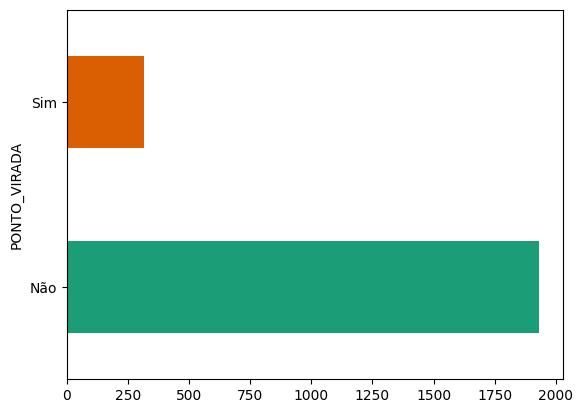

In [ ]:
#  PONTO_VIRADA

dados_pm.groupby('PONTO_VIRADA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
dados_pm.groupby('ANO')['PONTO_VIRADA'].value_counts()

ANO   PONTO_VIRADA
2020  Não             607
      Sim              94
2021  Não             576
      Sim             108
2022  Não             749
      Sim             113
Name: count, dtype: int64

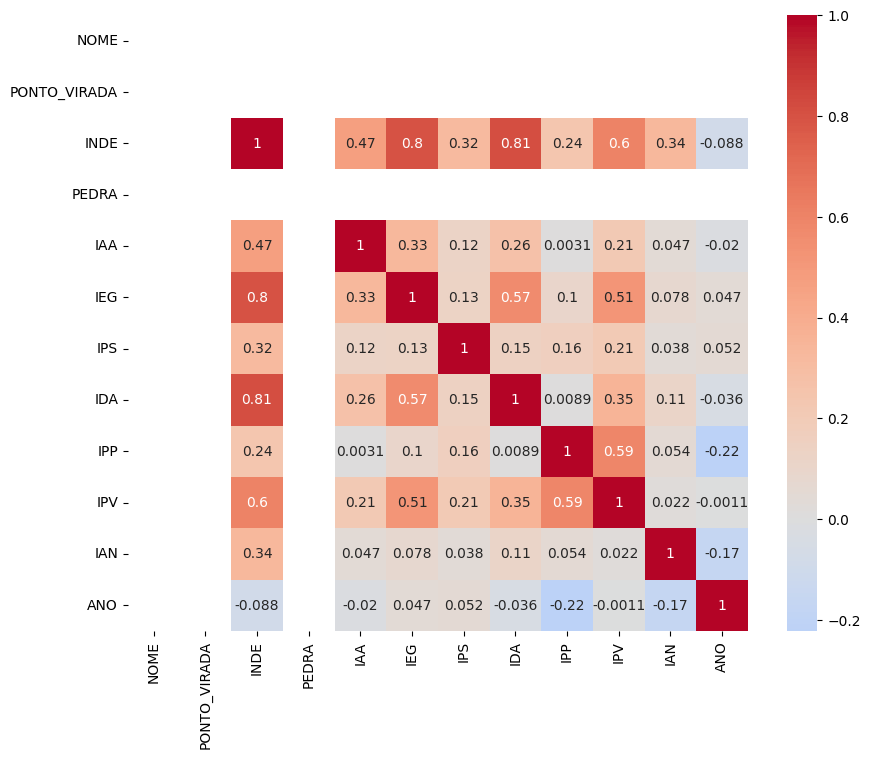

In [ ]:
analyse_corr(dados_pm)

In [ ]:
lista = list(dados_pm['NOME'].unique())
len(lista)

1348

In [ ]:
dados_pm.head()

,NOME,PONTO_VIRADA,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,IPV,IAN,ANO
0,ALUNO-1,Não,7.883752,Ametista,8.50002,8.7,7.500,7.000000,5.9375,7.750000,10.0,2020
2,ALUNO-3,Não,7.856390,Ametista,7.91667,8.9,7.500,5.500000,8.1250,8.111113,10.0,2020
3,ALUNO-4,Não,5.076252,Quartzo,8.00002,4.1,6.875,0.000000,7.1875,7.750000,5.0,2020
4,ALUNO-5,Não,8.077085,Ametista,7.50002,8.0,7.500,7.500000,8.4375,8.166665,10.0,2020
7,ALUNO-8,Sim,8.381391,Ametista,8.33334,9.9,4.375,7.333333,8.7500,8.944450,10.0,2020


In [ ]:
len(list(dados_pm.columns))

12

In [ ]:
indicadores = valor_medio_indicadores[['IAA', 'IEG', 'IPS','IDA', 'IPP', 'IPV', 'IAN']].T.reset_index()
indicadores = indicadores.rename(columns={'index':'Indicador'})
indicadores

ANO,Indicador,2020,2021,2022
0,IAA,8.368882,8.155702,8.263065
1,IEG,7.681155,6.842544,7.880728
2,IPS,6.737448,6.848977,6.901102
3,IDA,6.322260,5.430556,6.070688
4,IPP,7.067859,7.598538,6.299364
5,IPV,7.242243,7.429240,7.247953
6,IAN,7.431224,6.900585,6.421114


In [ ]:
import plotly.express as px

In [ ]:
px.bar(y='Indicador', x=[2020, 2021, 2022], text_auto=True, orientation='h', data_frame=indicadores)
# px.bar(x='Indicador', y=2021, data_frame=indicadores)


In [ ]:
px.line(indicadores, x='Indicador', y=[2020, 2021, 2022], markers=True)

In [ ]:
len(df['NOME'].unique())

1349

In [ ]:
len(dados_pm['NOME'].unique())

1348

In [ ]:
alunos_por_ano = dados_pm.groupby('ANO')['NOME'].count().reset_index()
alunos_por_ano = alunos_por_ano.rename(columns={'NOME':'TOTAL'})
alunos_por_ano['taxa_crescimento'] = alunos_por_ano['TOTAL'].diff()
alunos_por_ano.set_index('ANO', inplace=True)
alunos_por_ano

,TOTAL,taxa_crescimento
ANO,,
2020,727,NaN
2021,684,-43.0
2022,862,178.0


In [ ]:
alunos_por_ano.loc[2020]

,2020
TOTAL,727.0
taxa_crescimento,NaN


In [ ]:
df.head()

,INSTITUICAO_ENSINO_ALUNO_2020,NOME,IDADE_ALUNO_2020,ANOS_PM_2020,FASE_TURMA_2020,PONTO_VIRADA_2020,INDE_2020,INDE_CONCEITO_2020,PEDRA_2020,DESTAQUE_IEG_2020,DESTAQUE_IDA_2020,DESTAQUE_IPV_2020,IAA_2020,IEG_2020,IPS_2020,IDA_2020,IPP_2020,IPV_2020,IAN_2020,FASE_2021,TURMA_2021,INSTITUICAO_ENSINO_ALUNO_2021,SINALIZADOR_INGRESSANTE_2021,PEDRA_2021,INDE_2021,IAA_2021,IEG_2021,IPS_2021,IDA_2021,IPP_2021,REC_EQUIPE_1_2021,REC_EQUIPE_2_2021,REC_EQUIPE_3_2021,REC_EQUIPE_4_2021,PONTO_VIRADA_2021,IPV_2021,IAN_2021,NIVEL_IDEAL_2021,DEFASAGEM_2021,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022
0,Escola Pública,ALUNO-1,11,2,2H,Não,7.883752,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,8.500020000000001,8.7,7.5,7,5.9375,7.75,10,2.0,G,Rede Decisão,Ingressante,Ametista,7.319,7.5,6.3,6.9,8.8,7.7,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,8.1,5.0,Nível 3 (7o e 8o ano),-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,ALUNO-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano)
2,Escola Pública,ALUNO-3,12,2,3H,Não,7.856389666666666,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Seu destaque em 2020: A sua boa integração aos...,7.91667,8.9,7.5,5.5,8.125,8.111113333333334,10,3.0,F,Escola Pública,Veterano,Ametista,7.021,7.1,6.9,6.3,5.6,7.3,Promovido de Fase,Promovido de Fase,Mantido na Fase atual,Não avaliado,Não,7.2,10.0,Nível 3 (7o e 8o ano),0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Escola Pública,ALUNO-4,10,2,1D,Não,5.076252,D,Quartzo,Ponto a melhorar em 2021: Melhorar a sua entre...,Ponto a melhorar em 2021: Empenhar-se mais nas...,Ponto a melhorar em 2021: Integrar-se mais aos...,8.000020000000001,4.1,6.875,0,7.1875,7.75,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano)
4,Escola Pública,ALUNO-5,10,1,2M,Não,8.077085,B,Ametista,Seu destaque em 2020: A sua boa entrega das li...,Seu destaque em 2020: As suas boas notas na Pa...,Seu destaque em 2020: A sua boa integração aos...,7.50002,8,7.5,7.5,8.4375,8.166665,10,2.0,L,Escola Pública,Veterano,Ametista,7.399,7.4,7.5,7.5,5.4,8.5,Promovido de Fase,Mantido na Fase atual,Mantido na Fase atual,Não avaliado,Não,7.4,10.0,Nível 2 (5o e 6o ano),0.0,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual

In [ ]:
pedra_por_ano = dados_pm.groupby(['PEDRA', 'ANO']).size().reset_index()
pedra_por_ano = pd.DataFrame(pedra_por_ano)
pedra_por_ano.rename(columns={0:"TOTAL"}, inplace=True)

In [ ]:
pedra_por_ano

,PEDRA,ANO,TOTAL
0,Ametista,2020,336
1,Ametista,2021,295
2,Ametista,2022,348
3,Quartzo,2020,128
4,Quartzo,2021,110
5,Quartzo,2022,134
6,Topázio,2020,92
7,Topázio,2021,101
8,Topázio,2022,130
9,Ágata,2020,171


In [ ]:
indicadores_com_inde = valor_medio_indicadores[['INDE','IAA', 'IEG', 'IPS','IDA', 'IPP', 'IPV', 'IAN']].T.reset_index()
indicadores_com_inde = indicadores.rename(columns={'index':'Indicador'})
indicadores_com_inde

ANO,Indicador,2020,2021,2022
0,IAA,8.368882,8.155702,8.263065
1,IEG,7.681155,6.842544,7.880728
2,IPS,6.737448,6.848977,6.901102
3,IDA,6.322260,5.430556,6.070688
4,IPP,7.067859,7.598538,6.299364
5,IPV,7.242243,7.429240,7.247953
6,IAN,7.431224,6.900585,6.421114


In [ ]:
fig = px.imshow(dados_pm,text_auto=True)
fig.show()

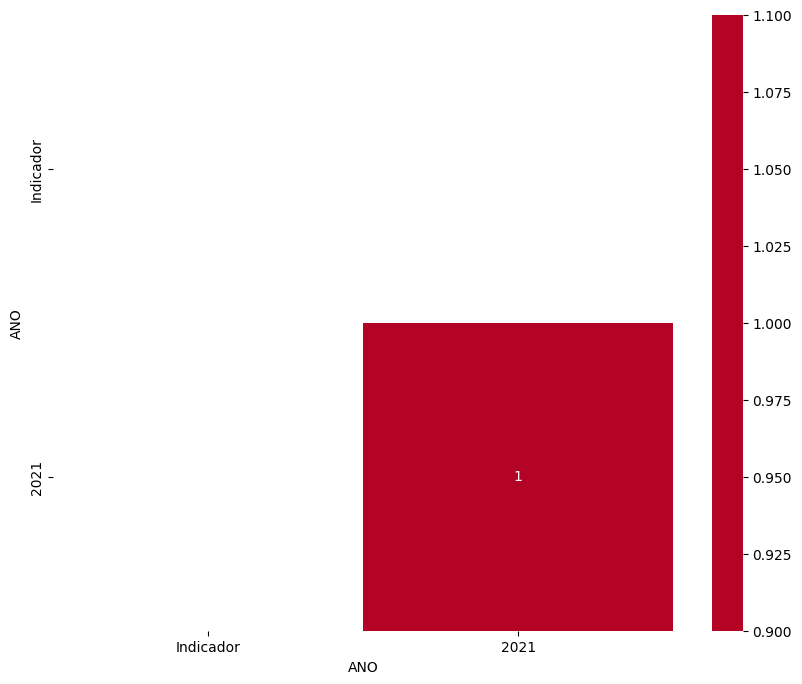

In [ ]:
analyse_corr(indicadores_com_inde[['Indicador', 2021]])

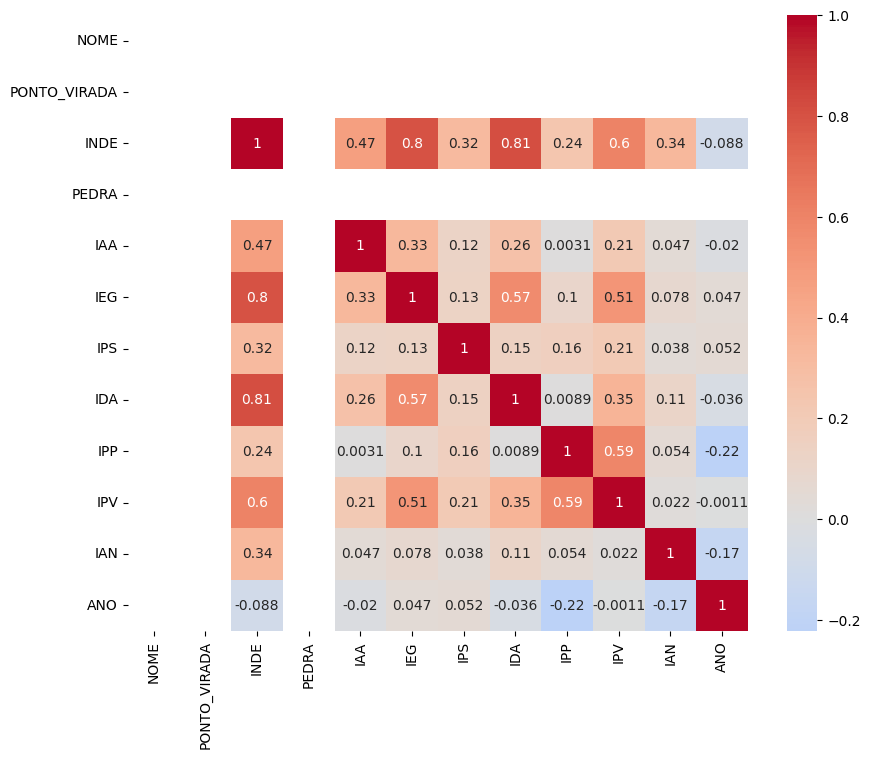

In [ ]:
analyse_corr(dados_pm)

In [ ]:
def analyse_corr_plotly(df):
  df = df.apply(pd.to_numeric, errors='coerce')

  corr_matrix = df.corr()
  px.imshow(corr_matrix,text_auto=True, aspect="auto")
  # fig.show()

In [ ]:
analyse_corr_plotly(dados_pm[['INDE','IAA', 'IEG', 'IPS','IDA', 'IPP', 'IPV', 'IAN']])

In [ ]:
virada_por_ano = dados_pm.groupby(['PONTO_VIRADA', 'ANO']).size().reset_index()
virada_por_ano = pd.DataFrame(virada_por_ano)
virada_por_ano.rename(columns={0:"TOTAL"}, inplace=True)
virada_por_ano

,PONTO_VIRADA,ANO,TOTAL
0,Não,2020,607
1,Não,2021,576
2,Não,2022,749
3,Sim,2020,94
4,Sim,2021,108
5,Sim,2022,113


In [ ]:
fig_pedra_2020 = px.pie(virada_por_ano.query('ANO == 2020'), values='TOTAL', names='PONTO_VIRADA', title='Percentual de atingimento do ponto de virada em 2020', color_discrete_sequence=px.colors.sequential.RdBu)
fig_pedra_2021 = px.pie(virada_por_ano.query('ANO == 2021'), values='TOTAL', names='PONTO_VIRADA', title='Percentual de atingimento do ponto de virada em 2021', color_discrete_sequence=px.colors.sequential.RdBu)
fig_pedra_2022 = px.pie(virada_por_ano.query('ANO == 2022'), values='TOTAL', names='PONTO_VIRADA', title='Percentual de atingimento do ponto de virada em 2022', color_discrete_sequence=px.colors.sequential.RdBu)


In [ ]:
fig_pedra_2020.show()
fig_pedra_2021.show()
fig_pedra_2022.show()


In [ ]:
# analisando ano de 2022

In [ ]:
df_2022.head()

,NOME,INDE,PEDRA,IAA,IEG,IPS,IDA,IPP,PONTO_VIRADA,IPV,IAN,ANO
1,ALUNO-2,7.675509,Ametista,10.00002,7.581705,7.5,8.816667,5.625000,Não,7.916665,5.0,2022
3,ALUNO-4,7.117065,Ametista,10.00002,8.071429,7.5,5.083333,6.250000,Não,8.055553,5.0,2022
4,ALUNO-5,7.232336,Ametista,6.41668,8.557505,7.5,7.083333,6.458333,Não,7.833337,5.0,2022
5,ALUNO-6,7.741669,Ametista,9.00002,9.333333,7.5,5.500000,6.250000,Não,7.500000,10.0,2022
6,ALUNO-7,7.406743,Ametista,10.00002,9.314954,7.5,5.583333,5.937500,Não,7.916670,5.0,2022


In [ ]:
dados_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,ANO
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),2022
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),2022
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2022
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),2022
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano),2022


In [ ]:
# analisando ano de 2022

bolsistas_2022 = dados_2022.groupby(['ANO', 'INDICADO_BOLSA_2022'])['INDE_2022'].mean().reset_index()

In [ ]:
bolsistas_2022.head()

,ANO,INDICADO_BOLSA_2022,INDE_2022
0,2022,Não,6.958632
1,2022,Sim,7.413832


In [ ]:
px.bar(data_frame=bolsistas_2022, x = 'INDICADO_BOLSA_2022', y = 'INDE_2022')

In [ ]:
dados_2022.head()

,NOME,FASE_2022,TURMA_2022,ANO_INGRESSO_2022,BOLSISTA_2022,INDE_2022,CG_2022,CF_2022,CT_2022,PEDRA_2022,DESTAQUE_IEG_2022,DESTAQUE_IDA_2022,DESTAQUE_IPV_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,NOTA_PORT_2022,NOTA_MAT_2022,NOTA_ING_2022,QTD_AVAL_2022,IPP_2022,REC_AVA_1_2022,REC_AVA_2_2022,REC_AVA_3_2022,REC_AVA_4_2022,INDICADO_BOLSA_2022,PONTO_VIRADA_2022,IPV_2022,IAN_2022,NIVEL_IDEAL_2022,ANO
1,ALUNO-2,0.0,K,2022.0,Não,7.675509,245.0,66.0,6.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Destaque: As suas boas notas na Passos Mágicos.,Destaque: A sua boa integração aos Princípios ...,10.00002,7.581705,7.5,8.816667,8.200000,9.433333,NaN,2.0,5.625000,Mantido na Fase + Bolsa,Mantido na Fase atual,NaN,NaN,Sim,Não,7.916665,5.0,Fase 2 (5º e 6º ano),2022
3,ALUNO-4,2.0,J,2022.0,Não,7.117065,451.0,69.0,3.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,8.071429,7.5,5.083333,5.000000,5.166667,NaN,3.0,6.250000,Promovido de Fase,Mantido na Fase atual,Promovido de Fase,NaN,Não,Não,8.055553,5.0,Fase 3 (7º e 8º ano),2022
4,ALUNO-5,2.0,L,2019.0,Não,7.232336,415.0,61.0,12.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,6.41668,8.557505,7.5,7.083333,6.666667,7.500000,NaN,3.0,6.458333,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.833337,5.0,Fase 3 (7º e 8º ano),2022
5,ALUNO-6,2.0,K,2022.0,Não,7.741669,221.0,35.0,2.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,9.00002,9.333333,7.5,5.500000,3.000000,8.000000,NaN,3.0,6.250000,Mantido na Fase atual,Promovido de Fase,Mantido na Fase atual,NaN,Não,Não,7.500000,10.0,Fase 2 (5º e 6º ano),2022
6,ALUNO-7,1.0,U,2022.0,Não,7.406743,357.0,93.0,7.0,Ametista,Destaque: A sua boa entrega das lições de casa.,Melhorar: Empenhar-se mais nas aulas e avaliaç...,Destaque: A sua boa integração aos Princípios ...,10.00002,9.314954,7.5,5.583333,4.666667,6.500000,NaN,2.0,5.937500,Promovido de Fase,Promovido de Fase,NaN,NaN,Não,Não,7.916670,5.0,Fase 2 (5º e 6º ano),2022


In [ ]:
px.histogram(dados_2022, x="PONTO_VIRADA_2022", color='BOLSISTA_2022', nbins=8, text_auto=True,  title='Histograma comparativo dos alunos bolsistas com alunos não bolsistas')

In [ ]:
dados_2022['BOLSISTA_2022'].value_counts(normalize=True).reset_index()

,BOLSISTA_2022,proportion
0,Não,0.87471
1,Sim,0.12529


In [ ]:
px.pie(data_frame=dados_2022['BOLSISTA_2022'].value_counts(normalize=True).reset_index(), values='proportion', names='BOLSISTA_2022', title="Proporção de Alunos Bolsistas")

In [ ]:
media_indicadores_2022 = dados_2022.groupby('BOLSISTA_2022')[['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022']].mean().reset_index()

In [ ]:
media_indicadores_2022

,BOLSISTA_2022,INDE_2022,IAA_2022,IEG_2022,IPS_2022,IDA_2022,IPP_2022,IPV_2022,IAN_2022
0,Não,6.932167,8.299971,7.786658,6.965351,5.919975,6.118479,7.145592,6.233422
1,Sim,7.699753,8.005411,8.537472,6.452546,7.122891,7.562211,7.962579,7.731481


In [ ]:
px.bar(data_frame=media_indicadores_2022, x='BOLSISTA_2022', y=['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022'], text_auto=True, barmode='group', orientation='v' )

In [ ]:
media_ponto_virada_2022 = dados_2022.groupby(['BOLSISTA_2022','PONTO_VIRADA_2022'])[['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022']].mean().reset_index()
media_ponto_virada_2022
px.bar(data_frame=media_ponto_virada_2022, x='PONTO_VIRADA_2022', y=['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022'], text_auto=True, barmode='group', orientation='v' )

In [ ]:
media_pedra_2022 = dados_2022.groupby('PEDRA_2022')[['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022']].mean().reset_index()
px.bar(data_frame=media_pedra_2022, x='PEDRA_2022', y=['INDE_2022','IAA_2022', 'IEG_2022', 'IPS_2022','IDA_2022', 'IPP_2022', 'IPV_2022', 'IAN_2022'], text_auto=True, barmode='group', orientation='v' )

In [ ]:
media_disciplinas_2022 = dados_2022.groupby('BOLSISTA_2022')[['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022']].mean().reset_index()

In [ ]:
px.bar(data_frame=media_disciplinas_2022, x='BOLSISTA_2022', y=['NOTA_PORT_2022', 'NOTA_MAT_2022', 'NOTA_ING_2022'], text_auto=True, barmode='group', orientation='v' )